<a href="https://colab.research.google.com/github/mkar0809/Python--Pit/blob/main/03_01_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
pd.to_datetime('today').strftime('%d %B %Y')

'03 January 2024'

In [2]:
# Three years data, 1 Jan 2020 - 31 Dec 2022
#
!wget -q https://github.com/Praxis-QR/FDS/raw/main/data/fintech/Birla.xlsx
!wget -q https://github.com/Praxis-QR/FDS/raw/main/data/fintech/Canara.xlsx
!wget -q https://github.com/Praxis-QR/FDS/raw/main/data/fintech/icici.xlsx
!wget -q https://raw.githubusercontent.com/Praxis-QR/FDS/main/data/fintech/NIFTY_50_Data_2020-2022.csv


In [4]:
dfNIFTY_ = pd.read_csv('/content/NIFTY_50_Data_2020-2022.csv', header=0)
dfNIFTY = dfNIFTY_.loc[::-1]                                                # reverse the order of rows
dfNIFTY['Date'] =  pd.to_datetime(dfNIFTY['Date'], format='%d %b %Y')       # set the Date column to date formatt
                                                                            # alternate formats https://docs.python.org/3.7/library/datetime.html#strftime-strptime-behavior
dfNIFTY.set_index('Date', inplace =True)                                    #
dfNIFTY.drop(['Open','High','Low'], axis = 1, inplace =True)                # Drop three columns
dfNIFTY = dfNIFTY.rename(columns ={'Close':'NIFTY'})                        # Rename CLOSE column to NIFTY
dfNIFTY.head()

,NIFTY
Date,
2020-01-01,12182.50
2020-01-02,12282.20
2020-01-03,12226.65
2020-01-06,11993.05
2020-01-07,12052.95


In [5]:
#print(dfNIFTY)
dfNIFTY.count()

NIFTY    748
dtype: int64

In [6]:
# Read xlsx data into dataframe
def AMFIdata(fileName, fundName):
    df = pd.read_excel(fileName, header=4)                                      # convert xlsx file into dataframe, ignore first four lines
    df.drop(['Repurchase Price','Sale Price'], axis = 1, inplace =True)         #  drop two unnecessary columns
    df = df.rename(columns ={'NAV date':'Date','Net Asset Value':fundName })    # rename column with fund name for comparisons later
    df['Date'] =  pd.to_datetime(df['Date'])                                    # change the date from string to date-time format
    df.drop_duplicates(inplace = True)                                          # remove duplicate data from the set
    df.set_index('Date', inplace =True)                                         # make the Date column as the index
    return df

In [7]:
dfBirla = AMFIdata('Birla.xlsx','Birla')
dfICICI = AMFIdata('icici.xlsx','ICICI')
dfCanara = AMFIdata('Canara.xlsx','Canara')
dfBirla.count(), dfICICI.count(), dfCanara.count()

(Birla    744
 dtype: int64,
 ICICI    744
 dtype: int64,
 Canara    744
 dtype: int64)

In [8]:
dfFunds = pd.merge(dfCanara,pd.merge(dfBirla,dfICICI,on='Date'),on='Date')
dfFunds.head()

,Canara,Birla,ICICI
Date,,,
2020-01-01,29.16,248.12,121.4474
2020-01-02,29.34,250.23,122.4356
2020-01-03,29.24,249.32,121.8871
2020-01-06,28.76,244.38,119.5867
2020-01-07,28.93,245.27,120.1723


In [9]:
df = pd.merge(dfNIFTY,dfFunds,on='Date')
df.head()

,NIFTY,Canara,Birla,ICICI
Date,,,,
2020-01-01,12182.50,29.16,248.12,121.4474
2020-01-02,12282.20,29.34,250.23,122.4356
2020-01-03,12226.65,29.24,249.32,121.8871
2020-01-06,11993.05,28.76,244.38,119.5867
2020-01-07,12052.95,28.93,245.27,120.1723


In [10]:
df.count()

NIFTY     744
Canara    744
Birla     744
ICICI     744
dtype: int64

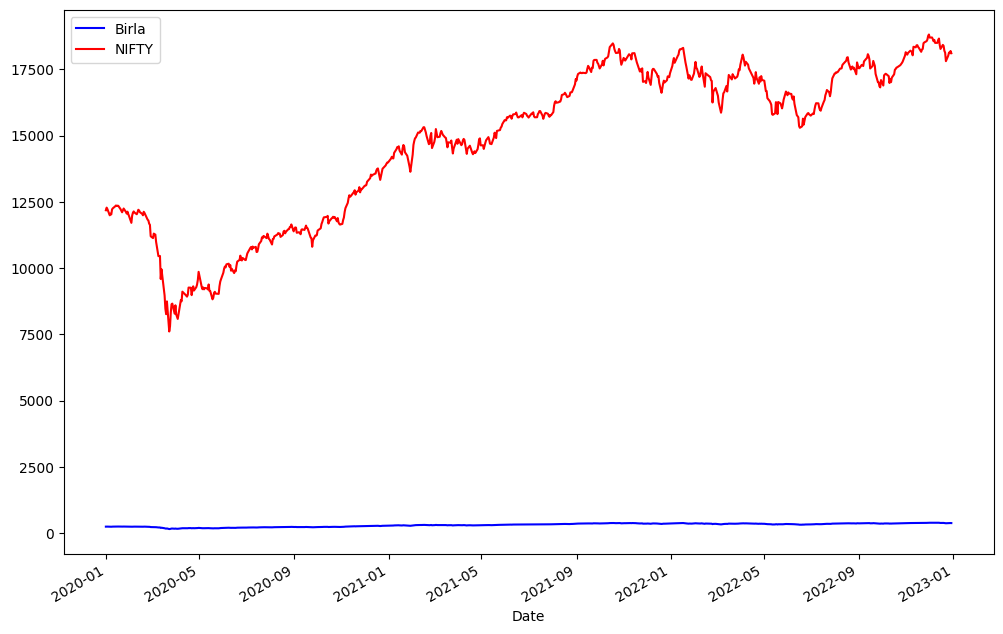

In [11]:
# Plotting directly from DataFrames with Pandas
df.plot(y=['Birla','NIFTY'],kind='line', color=['blue','red'], figsize=(12,8));



In [12]:
dfCopy = df.copy()
dfCopy


,NIFTY,Canara,Birla,ICICI
Date,,,,
2020-01-01,12182.50,29.16,248.12,121.4474
2020-01-02,12282.20,29.34,250.23,122.4356
2020-01-03,12226.65,29.24,249.32,121.8871
2020-01-06,11993.05,28.76,244.38,119.5867
2020-01-07,12052.95,28.93,245.27,120.1723
...,...,...,...,...
2022-12-26,18014.60,46.82,381.00,184.2698
2022-12-27,18132.30,47.06,383.12,185.4708
2022-12-28,18122.50,47.03,382.86,185.3692


In [13]:
#we need to scale the data
dfCopy['Adj NIFTY'] = dfCopy['NIFTY']/dfCopy.iloc[0]['NIFTY']
dfCopy['Adj Canara'] = dfCopy['Canara']/dfCopy.iloc[0]['Canara']
dfCopy['Adj Birla'] = dfCopy['Birla']/dfCopy.iloc[0]['Birla']
dfCopy['Adj ICICI'] = dfCopy['ICICI']/dfCopy.iloc[0]['ICICI']
dfCopy.head()


,NIFTY,Canara,Birla,ICICI,Adj NIFTY,Adj Canara,Adj Birla,Adj ICICI
Date,,,,,,,,
2020-01-01,12182.50,29.16,248.12,121.4474,1.000000,1.000000,1.000000,1.000000
2020-01-02,12282.20,29.34,250.23,122.4356,1.008184,1.006173,1.008504,1.008137
2020-01-03,12226.65,29.24,249.32,121.8871,1.003624,1.002743,1.004836,1.003620
2020-01-06,11993.05,28.76,244.38,119.5867,0.984449,0.986283,0.984927,0.984679
2020-01-07,12052.95,28.93,245.27,120.1723,0.989366,0.992112,0.988514,0.989501


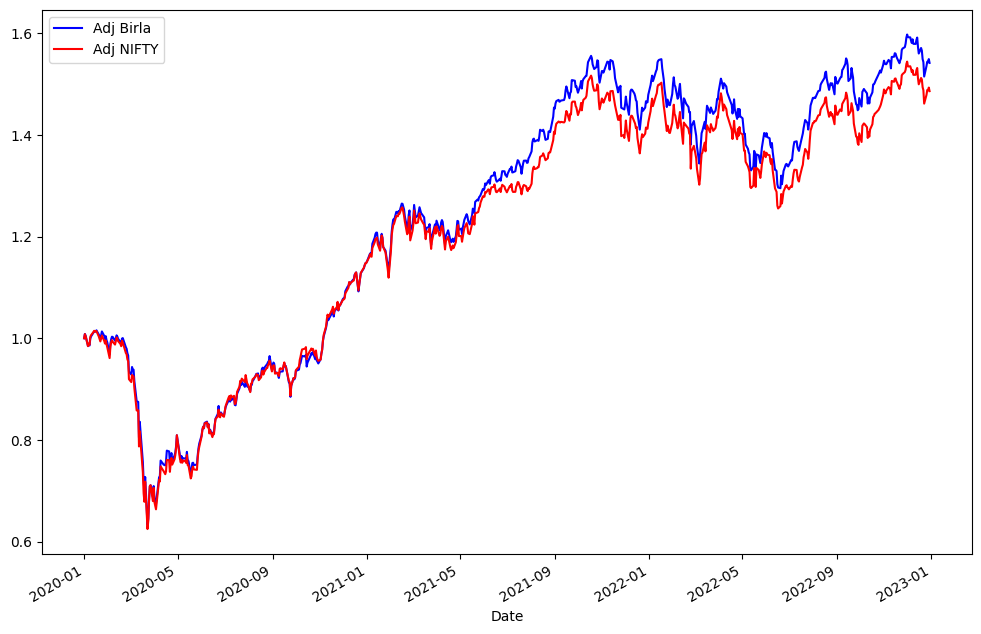

In [14]:
# Plotting directly from DataFrames with Pandas
dfCopy.plot(y=['Adj Birla','Adj NIFTY'], kind='line', color=['blue','red'],figsize=(12,8));




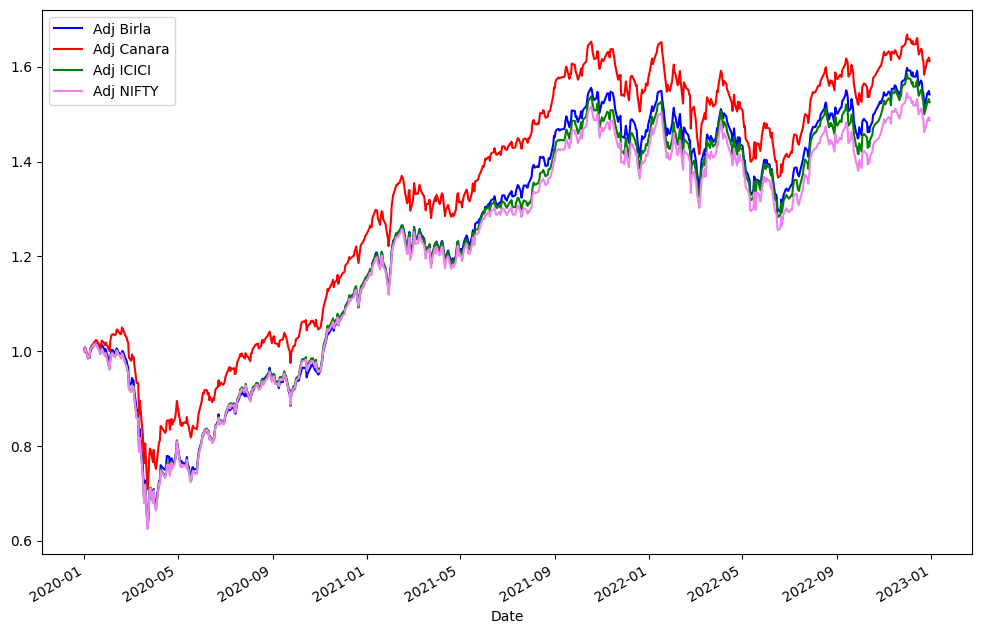

In [15]:
# Plotting directly from DataFrames with Pandas
dfCopy.plot(y=['Adj Birla','Adj Canara','Adj ICICI','Adj NIFTY'], kind='line', color=['blue','red','green','violet'],figsize=(12,8));


In [16]:
df.head()

,NIFTY,Canara,Birla,ICICI
Date,,,,
2020-01-01,12182.50,29.16,248.12,121.4474
2020-01-02,12282.20,29.34,250.23,122.4356
2020-01-03,12226.65,29.24,249.32,121.8871
2020-01-06,11993.05,28.76,244.38,119.5867
2020-01-07,12052.95,28.93,245.27,120.1723


In [17]:
#Daily Log Returns
dailyLogReturns = df.pct_change().apply(lambda x: np.log(1+x))
dailyLogReturns.head()

,NIFTY,Canara,Birla,ICICI
Date,,,,
2020-01-01,NaN,NaN,NaN,NaN
2020-01-02,0.008151,0.006154,0.008468,0.008104
2020-01-03,-0.004533,-0.003414,-0.003643,-0.004490
2020-01-06,-0.019291,-0.016552,-0.020013,-0.019054
2020-01-07,0.004982,0.005894,0.003635,0.004885


In [19]:
#Daily Log Returns
dailyLogReturns = df.pct_change().apply(lambda x: np.log(1+x))
dailyLogReturns.head()

,NIFTY,Canara,Birla,ICICI
Date,,,,
2020-01-01,NaN,NaN,NaN,NaN
2020-01-02,0.008151,0.006154,0.008468,0.008104
2020-01-03,-0.004533,-0.003414,-0.003643,-0.004490
2020-01-06,-0.019291,-0.016552,-0.020013,-0.019054
2020-01-07,0.004982,0.005894,0.003635,0.004885


In [24]:
# Assuming dailyLogReturns has a DateTimeIndex
dailyLogReturns.index = pd.to_datetime(dailyLogReturns.index)  # Ensure index is datetime if not already

# Extract year from the index and group by it
dailyLogReturns['Year'] = dailyLogReturns.index.year  # Create a new column 'Year'
annualLogReturns = dailyLogReturns.groupby('Year').sum()  # Group by 'Year' and sum the log returns

In [18]:
dailyLogReturns['Year'] = dailyLogReturns.index.year
dailyLogReturns.head()

,NIFTY,Canara,Birla,ICICI,Year
Date,,,,,
2020-01-01,NaN,NaN,NaN,NaN,2020
2020-01-02,0.008151,0.006154,0.008468,0.008104,2020
2020-01-03,-0.004533,-0.003414,-0.003643,-0.004490,2020
2020-01-06,-0.019291,-0.016552,-0.020013,-0.019054,2020
2020-01-07,0.004982,0.005894,0.003635,0.004885,2020


In [25]:
dailyLogReturns['Year'] = dailyLogReturns.index.year
dailyLogReturns.head()

,NIFTY,Canara,Birla,ICICI,Year
Date,,,,,
2020-01-01,NaN,NaN,NaN,NaN,2020
2020-01-02,0.008151,0.006154,0.008468,0.008104,2020
2020-01-03,-0.004533,-0.003414,-0.003643,-0.004490,2020
2020-01-06,-0.019291,-0.016552,-0.020013,-0.019054,2020
2020-01-07,0.004982,0.005894,0.003635,0.004885,2020


In [26]:
# logReturns are additive!
annualLogReturns = dailyLogReturns.groupby('Year').sum()
annualLogReturns

,NIFTY,Canara,Birla,ICICI
Year,,,,
2020,0.137752,0.219571,0.138647,0.144292
2021,0.216073,0.235185,0.252748,0.225047
2022,0.042379,0.022594,0.041500,0.052557


In [27]:
#Calculate Simple Returns from Log Returns
annualLogReturns['NIFTY_SR'] = np.exp(annualLogReturns['NIFTY']) - 1
annualLogReturns['Canara_SR'] = np.exp(annualLogReturns['Canara']) - 1
annualLogReturns['Birla_SR'] = np.exp(annualLogReturns['Birla']) - 1
annualLogReturns['ICICI_SR'] = np.exp(annualLogReturns['ICICI']) - 1
annualLogReturns


,NIFTY,Canara,Birla,ICICI,NIFTY_SR,Canara_SR,Birla_SR,ICICI_SR
Year,,,,,,,,
2020,0.137752,0.219571,0.138647,0.144292,0.147691,0.245542,0.148718,0.155222
2021,0.216073,0.235185,0.252748,0.225047,0.241193,0.265143,0.287559,0.252382
2022,0.042379,0.022594,0.041500,0.052557,0.043290,0.022851,0.042373,0.053962


In [28]:
#Year End Prices
df.resample('Y').last()

,NIFTY,Canara,Birla,ICICI
Date,,,,
2020-12-31,13981.75,36.32,285.02,140.2987
2021-12-31,17354.05,45.95,366.98,175.7075
2022-12-31,18105.30,47.00,382.53,185.1891


In [29]:
annualSimpleReturns = df.resample('Y').last().pct_change()
annualSimpleReturns
#Compare with Simple Returns computed from Log Returns

,NIFTY,Canara,Birla,ICICI
Date,,,,
2020-12-31,NaN,NaN,NaN,NaN
2021-12-31,0.241193,0.265143,0.287559,0.252382
2022-12-31,0.043290,0.022851,0.042373,0.053962


In [30]:
#Compute Log Returns from Simple Returns
annualSimpleReturns['NIFTY_LR'] = np.log(annualSimpleReturns['NIFTY']+1)
annualSimpleReturns['Canara_LR'] = np.log(annualSimpleReturns['Canara']+1)
annualSimpleReturns['Birla_LR'] = np.log(annualSimpleReturns['Birla']+1)
annualSimpleReturns['ICICI_LR'] = np.log(annualSimpleReturns['ICICI']+1)
annualSimpleReturns
#Compare with original set of Log Returns

,NIFTY,Canara,Birla,ICICI,NIFTY_LR,Canara_LR,Birla_LR,ICICI_LR
Date,,,,,,,,
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-31,0.241193,0.265143,0.287559,0.252382,0.216073,0.235185,0.252748,0.225047
2022-12-31,0.043290,0.022851,0.042373,0.053962,0.042379,0.022594,0.041500,0.052557


In [31]:
#Calculate the Daily Returns

#dfReturns = df[['NIFTY','Birla','Canara','ICICI']].pct_change()                                # Simple Returns
dfReturns = df[['NIFTY','Birla','Canara','ICICI']].pct_change().apply(lambda x: np.log(1+x))    # Log Returns
dfReturns.head()



,NIFTY,Birla,Canara,ICICI
Date,,,,
2020-01-01,NaN,NaN,NaN,NaN
2020-01-02,0.008151,0.008468,0.006154,0.008104
2020-01-03,-0.004533,-0.003643,-0.003414,-0.004490
2020-01-06,-0.019291,-0.020013,-0.016552,-0.019054
2020-01-07,0.004982,0.003635,0.005894,0.004885


In [32]:
# Average of Daily Returns
dfMeans = dfReturns.mean().to_frame()
dfMeans.columns=['Mean']
dfMeans

,Mean
NIFTY,0.000533
Birla,0.000583
Canara,0.000642
ICICI,0.000568


In [33]:
#this is std of daily returns
#do we need to convert this to standard deviation of annual returns
dfstdev = dfReturns.std().to_frame()
dfstdev.columns = ['stdev']
dfstdev

,stdev
NIFTY,0.014391
Birla,0.013523
Canara,0.012863
ICICI,0.014252


In [34]:
dfcomparison = dfMeans.merge(dfstdev,left_index=True,right_index=True)
dfcomparison

,Mean,stdev
NIFTY,0.000533,0.014391
Birla,0.000583,0.013523
Canara,0.000642,0.012863
ICICI,0.000568,0.014252


In [35]:
#Calculate Covariance of Returns
dfrcov = dfReturns.cov()
dfrcov

,NIFTY,Birla,Canara,ICICI
NIFTY,0.000207,0.000192,0.000183,0.000205
Birla,0.000192,0.000183,0.000172,0.000190
Canara,0.000183,0.000172,0.000165,0.000181
ICICI,0.000205,0.000190,0.000181,0.000203


In [37]:
dfrcov['NIFTY']

NIFTY     0.000207
Birla     0.000192
Canara    0.000183
ICICI     0.000205
Name: NIFTY, dtype: float64

In [36]:
# Volatility of NIFTY
dfrcov['NIFTY']['NIFTY']

0.00020709776241476514

In [38]:
dfbeta = pd.DataFrame(dfrcov['NIFTY']/dfrcov['NIFTY']['NIFTY'])
dfbeta.columns = ['beta']
dfbeta

,beta
NIFTY,1.000000
Birla,0.928632
Canara,0.884804
ICICI,0.990169


In [39]:
dfcomparison = dfcomparison.merge(dfbeta,left_index=True,right_index=True)
dfcomparison

,Mean,stdev,beta
NIFTY,0.000533,0.014391,1.000000
Birla,0.000583,0.013523,0.928632
Canara,0.000642,0.012863,0.884804
ICICI,0.000568,0.014252,0.990169


In [40]:
# Risk Free Return
rFree = 0.05/252  # daily return, multiply by 252 to get annual return ~ 5%

dfcomparison['Sharpe'] = (dfcomparison['Mean']-rFree)/dfcomparison['stdev']
dfcomparison

,Mean,stdev,beta,Sharpe
NIFTY,0.000533,0.014391,1.000000,0.023267
Birla,0.000583,0.013523,0.928632,0.028412
Canara,0.000642,0.012863,0.884804,0.034521
ICICI,0.000568,0.014252,0.990169,0.025921


In [41]:
dfcomparison['Treynor'] = (dfcomparison['Mean']-rFree)/dfcomparison['beta']
dfcomparison


,Mean,stdev,beta,Sharpe,Treynor
NIFTY,0.000533,0.014391,1.000000,0.023267,0.000335
Birla,0.000583,0.013523,0.928632,0.028412,0.000414
Canara,0.000642,0.012863,0.884804,0.034521,0.000502
ICICI,0.000568,0.014252,0.990169,0.025921,0.000373


In [42]:
rFree = 0.05/252  # daily return, multiply by 252 to get annual return ~ 5%
Rm = dfcomparison['Mean']['NIFTY']    # the realized return of the appropriate market index
Rm

0.0005332492831131701

In [43]:
#Jensons Alpha
dfcomparison['alpha'] = dfcomparison['Mean'] - rFree + dfcomparison['beta']*(Rm-rFree)
dfcomparison


,Mean,stdev,beta,Sharpe,Treynor,alpha
NIFTY,0.000533,0.014391,1.000000,0.023267,0.000335,0.000670
Birla,0.000583,0.013523,0.928632,0.028412,0.000414,0.000695
Canara,0.000642,0.012863,0.884804,0.034521,0.000502,0.000740
ICICI,0.000568,0.014252,0.990169,0.025921,0.000373,0.000701


In [44]:
# Annualised Return
TradingDays = 252
dfcomparison['Annual Return'] = dfcomparison['Mean']*TradingDays
dfcomparison

,Mean,stdev,beta,Sharpe,Treynor,alpha,Annual Return
NIFTY,0.000533,0.014391,1.000000,0.023267,0.000335,0.000670,0.134379
Birla,0.000583,0.013523,0.928632,0.028412,0.000414,0.000695,0.146823
Canara,0.000642,0.012863,0.884804,0.034521,0.000502,0.000740,0.161901
ICICI,0.000568,0.014252,0.990169,0.025921,0.000373,0.000701,0.143093
